In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [7]:
#df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(0%)')
df = pd.read_csv("Sales_no_outliers.csv")

# SDG Importantance on the whole Dataset and later on the industry

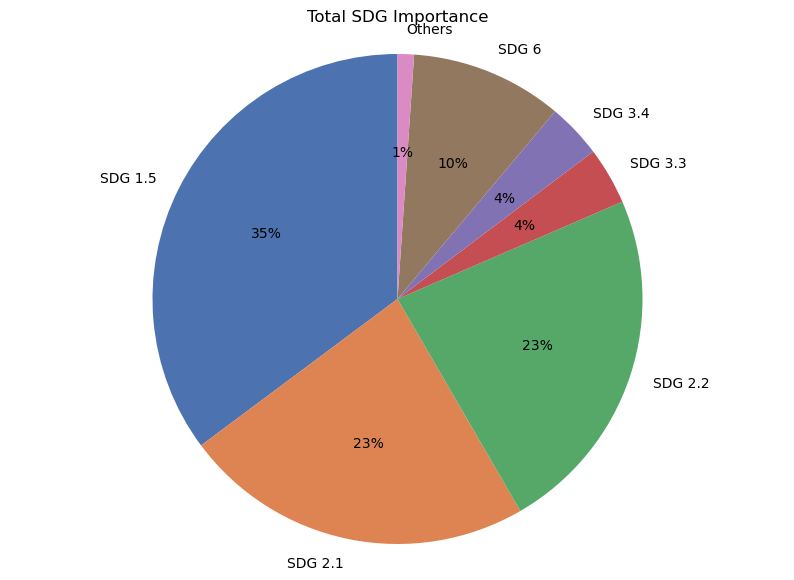

In [8]:
pie_chart_SDG = df.loc[:,"SDG 1.5":"SDG 15.5"]

# Calculate the sum of each column
abs_sums = pie_chart_SDG.sum().abs()

# Compute the percentages
total = abs_sums.sum()
percentages = (abs_sums / total) * 100

# Set a threshold (e.g., 1.0%) and filter out small values
threshold = 1.0
mask_small = percentages < threshold
small_sums = abs_sums[mask_small]

# Create "Others" category
if small_sums.sum() > 0:
    abs_sums = abs_sums[~mask_small]
    abs_sums['Others'] = small_sums.sum()

# Get the colors from Seaborn's "deep" palette
colors = sns.color_palette("deep", len(abs_sums))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(abs_sums, labels=abs_sums.index, colors=colors, autopct='%1.f%%', startangle=90)
plt.title("Total SDG Importance")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## SDG importanance only in 2019 on the whole dataset

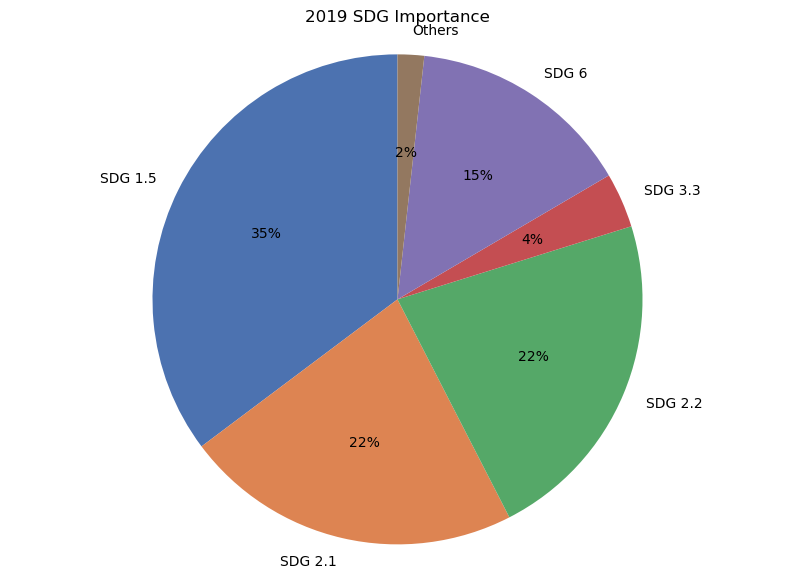

In [9]:

pie_chart_SDG2019 = df[df["Year"] == 2019]
pie_chart_SDG2019 = pie_chart_SDG2019.loc[:,"SDG 1.5":"SDG 15.5"]

# Calculate the sum of each column
abs_sums = pie_chart_SDG2019.sum().abs()

# Compute the percentages
total = abs_sums.sum()
percentages = (abs_sums / total) * 100

# Set a threshold (e.g., 1.0%) and filter out small values
threshold = 1.0
mask_small = percentages < threshold
small_sums = abs_sums[mask_small]

# Create "Others" category
if small_sums.sum() > 0:
    abs_sums = abs_sums[~mask_small]
    abs_sums['Others'] = small_sums.sum()

# Get the colors from Seaborn's "deep" palette
colors = sns.color_palette("deep", len(abs_sums))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(abs_sums, labels=abs_sums.index, colors=colors, autopct='%1.f%%', startangle=90)
plt.title("2019 SDG Importance")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Only looking at the SDG impact on Industry, See excel for further analysis and bar charts

In [10]:
brewery_df = df[df['GICS Sub-Industry'] == 'Brewers']
#airline_df.groupby("Company Name").describe
brewery_df.shape

(97, 37)

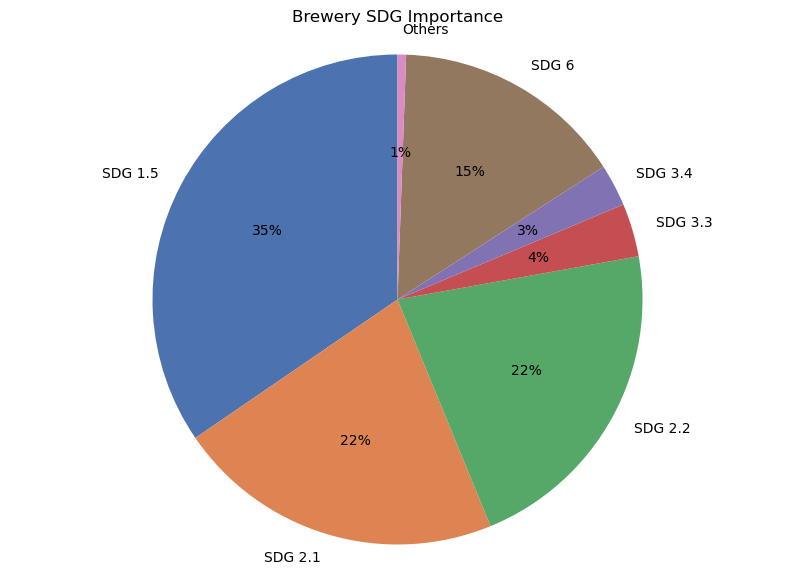

In [11]:
pie_chart_SDG = brewery_df.loc[:,"SDG 1.5":"SDG 15.5"]
# Calculate the sum of each column
abs_sums = pie_chart_SDG.sum().abs()

# Compute the percentages
total = abs_sums.sum()
percentages = (abs_sums / total) * 100

# Set a threshold (e.g., 1.0%) and filter out small values
threshold = 1.0
mask_small = percentages < threshold
small_sums = abs_sums[mask_small]

# Create "Others" category
if small_sums.sum() > 0:
    abs_sums = abs_sums[~mask_small]
    abs_sums['Others'] = small_sums.sum()

# Get the colors from Seaborn's "deep" palette
colors = sns.color_palette("deep", len(abs_sums))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(abs_sums, labels=abs_sums.index, colors=colors, autopct='%1.f%%', startangle=90)
plt.title("Brewery SDG Importance")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Compare all companies with each other but only those with over 10 Datapoints

In [12]:
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 10].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
filtered_df.shape

(70, 37)

## Compare the Actual environmental cost (millions)

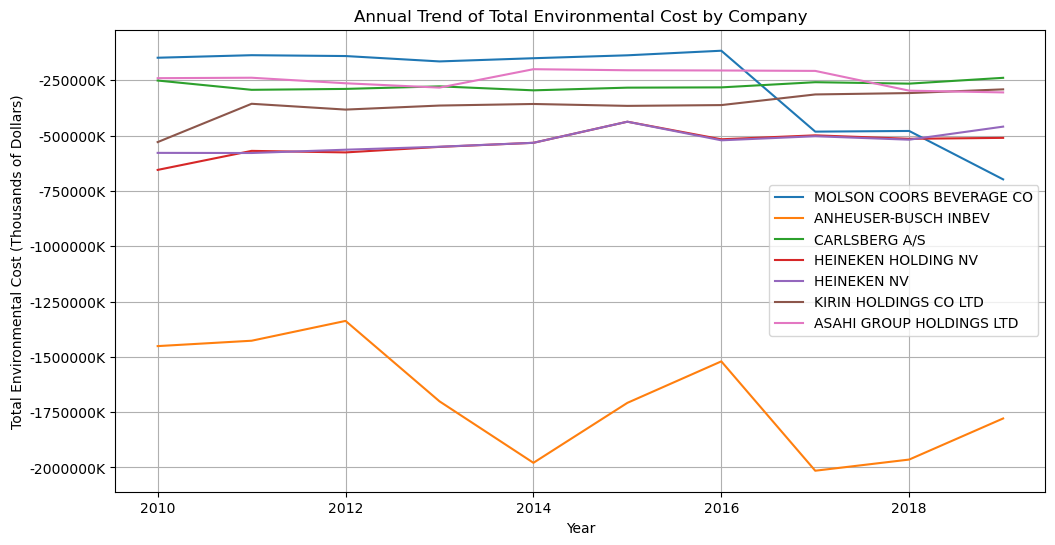

In [13]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels in thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return f'{x / 1000:.0f}K'

# Create a FuncFormatter object using the thousands function
formatter = FuncFormatter(thousands)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Total Environmental Cost"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Total Environmental Cost (Thousands of Dollars)")
plt.title("Annual Trend of Total Environmental Cost by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

## Compare the Enironmental intensity on Sales

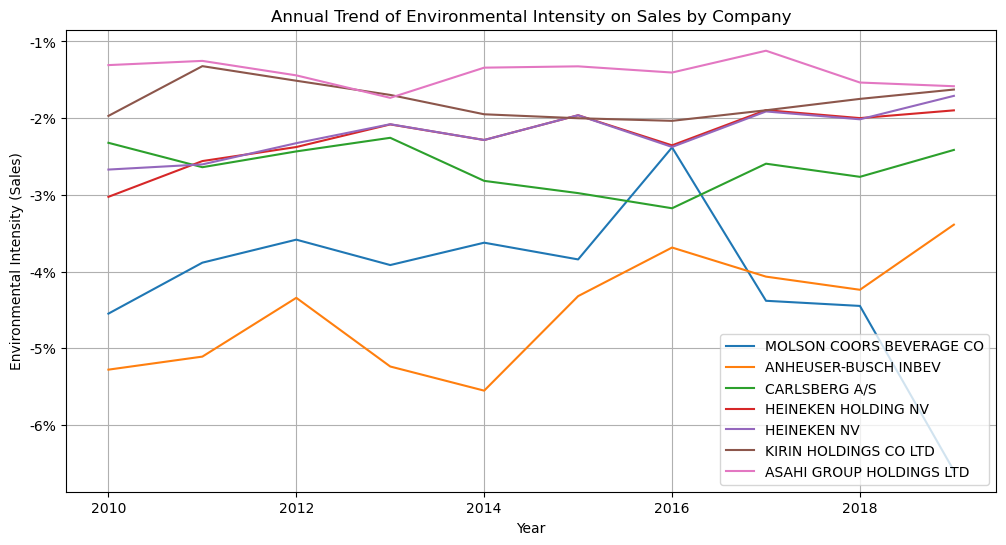

In [14]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Sales)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("Annual Trend of Environmental Intensity on Sales by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

## Compare the Environmental intensity on Operating income

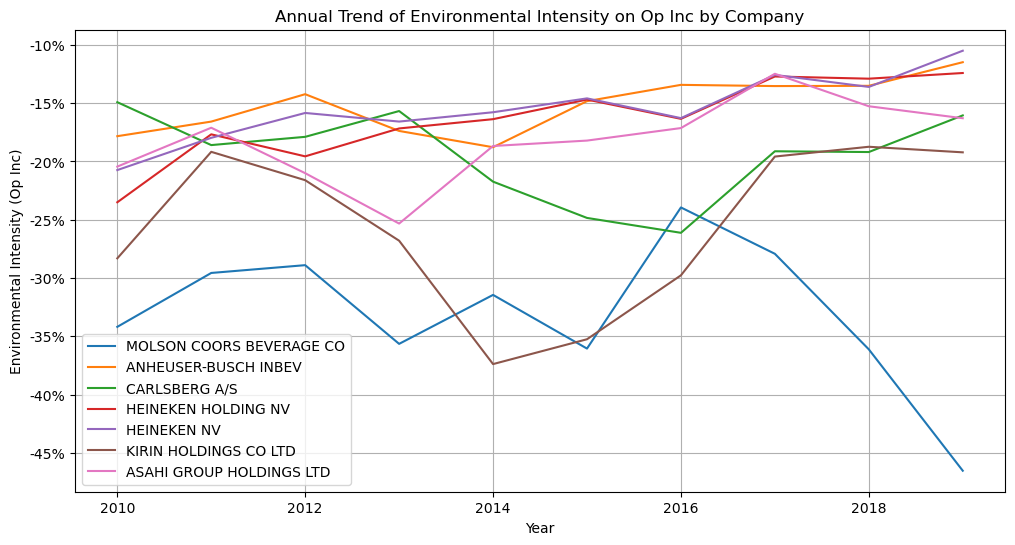

In [15]:
# Create a unique list of company names
company_names = filtered_df["Company Name"].unique()

# Set up the plot
plt.figure(figsize=(12, 6))

# Function to format Y-axis labels as percentages
def percentage(x, pos):
    return f'{x:.0%}'

# Create a FuncFormatter object using the percentage function
formatter = FuncFormatter(percentage)

# Iterate through each company and plot its annual trend
for company in company_names:
    company_data = filtered_df[filtered_df["Company Name"] == company]
    plt.plot(company_data["Year"], company_data["Environmental Intensity (Op Inc)"], label=company)

# Add labels and legend
plt.xlabel("Year")
plt.ylabel("Environmental Intensity (Op Inc)")
plt.title("Annual Trend of Environmental Intensity on Op Inc by Company")
plt.legend(loc="best")

# Apply the Y-axis label formatting as percentages
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.grid()
plt.show()

# Comparing the companies with each other, on each individual SDG, see next ipynb